In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings

In [55]:
#默认设置
%matplotlib inline
pd.set_option('display.float_format',lambda x:'%.4f'%x)#数值格式，避免科学计数法
#plt样式
plt.style.use('ggplot')
sns.set_style('whitegrid')
warnings.filterwarnings('ignore')#忽略警告

In [56]:
path = open('E:/数据集/lending-club-loan-data/loan.csv',encoding='utf-8')
data = pd.read_csv(path)
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0000,5000.0000,4975.0000,36 months,10.6500,162.8700,B,B2,NaN,10+ years,RENT,24000.0000,Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.6500,0.0000,Jan-1985,1.0000,nan,nan,3.0000,0.0000,13648.0000,83.7000,9.0000,f,0.0000,0.0000,5861.0714,5831.7800,5000.0000,861.0700,0.0000,0.0000,0.0000,Jan-2015,171.6200,NaN,Jan-2016,0.0000,nan,1.0000,INDIVIDUAL,nan,nan,NaN,0.0000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,1077430,1314167,2500.0000,2500.0000,2500.0000,60 months,15.2700,59.8300,C,C4,Ryder,< 1 year,RENT,30000.0000,Source Verified,Dec-2011,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.0000,0.0000,Apr-1999,5.0000,nan,nan,3.0000,0.0000,1687.0000,9.4000,4.0000,f,0.0000,0.0000,1008.7100,1008.7100,456.4600,435.1700,0.0000,117.0800,1.1100,Apr-2013,119.6600,NaN,Sep-2013,0.0000,nan,1.0000,INDIVIDUAL,nan,nan,NaN,0.0000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,1077175,1313524,2400.0000,2400.0000,2400.0000,36 months,15.9600,84.3300,C,C5,NaN,10+ years,RENT,12252.0000,Not Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.7200,0.0000,Nov-2001,2.0000,nan,nan,2.0000,0.0000,2956.0000,98.5000,10.0000,f,0.0000,0.0000,3003.6536,3003.6500,2400.0000,603.6500,0.0000,0.0000,0.0000,Jun-2014,649.9100,NaN,Jan-2016,0.0000,nan,1.0000,INDIVIDUAL,nan,nan,NaN,0.0000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,1076863,1277178,10000.0000,10000.0000,10000.0000,36 months,13.4900,339.3100,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0000,Source Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.0000,0.0000,Feb-1996,1.0000,35.0000,nan,10.0000,0.0000,5598.0000,21.0000,37.0000,f,0.0000,0.0000,12226.3022,12226.3000,10000.0000,2209.3300,16.9700,0.0000,0.0000,Jan-2015,357.4800,NaN,Jan-2015,0.0000,nan,1.0000,INDIVIDUAL,nan,nan,NaN,0.0000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
4,1075358,1311748,3000.0000,3000.0000,3000.0000,60 months,12.6900,67.7900,B,B5,University Medical Group,1 year,RENT,80000.0000,Source Verified,Dec-2011,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.9400,0.0000,Jan-1996,0.0000,38.0000,nan,15.0000,0.0000,27783.0000,53.9000,38.0000,f,766.9000,766.9000,3242.1700,3242.1700,2233.1000,1009.0700,0.0000,0.0000,0.0000,Jan-2016,67.7900,Feb-2016,Jan-2016,0.0000,nan,1.0000,INDIVIDUAL,nan,nan,NaN,0.0000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [57]:
data.shape  #887379个样本， 74个特征

(887379, 74)

先进行空值的查看

In [58]:
pd.set_option('display.max_rows',None)
data.isnull().sum(axis = 0).sort_values(ascending = False)/len(data)


dti_joint                     0.9994
verification_status_joint     0.9994
annual_inc_joint              0.9994
il_util                       0.9790
mths_since_rcnt_il            0.9765
all_util                      0.9759
max_bal_bc                    0.9759
open_rv_24m                   0.9759
open_rv_12m                   0.9759
total_cu_tl                   0.9759
total_bal_il                  0.9759
open_il_24m                   0.9759
open_il_12m                   0.9759
open_il_6m                    0.9759
open_acc_6m                   0.9759
inq_fi                        0.9759
inq_last_12m                  0.9759
desc                          0.8580
mths_since_last_record        0.8456
mths_since_last_major_derog   0.7502
mths_since_last_delinq        0.5120
next_pymnt_d                  0.2851
total_rev_hi_lim              0.0792
tot_cur_bal                   0.0792
tot_coll_amt                  0.0792
emp_title                     0.0580
emp_length                    0.0505
l

由上可见某些特征存在大量空值，我们选择剔除空值超过40%的特征


In [59]:
#剔除空值超过40%的特征
data.dropna(thresh=len(data)*0.4,inplace=True,axis=1)

In [60]:
data.isna().sum().sort_values(ascending = False)/len(data)

mths_since_last_delinq       0.5120
next_pymnt_d                 0.2851
tot_cur_bal                  0.0792
total_rev_hi_lim             0.0792
tot_coll_amt                 0.0792
emp_title                    0.0580
emp_length                   0.0505
last_pymnt_d                 0.0199
revol_util                   0.0006
title                        0.0002
collections_12_mths_ex_med   0.0002
last_credit_pull_d           0.0001
total_acc                    0.0000
delinq_2yrs                  0.0000
earliest_cr_line             0.0000
open_acc                     0.0000
pub_rec                      0.0000
inq_last_6mths               0.0000
acc_now_delinq               0.0000
annual_inc                   0.0000
out_prncp_inv                0.0000
out_prncp                    0.0000
issue_d                      0.0000
verification_status          0.0000
home_ownership               0.0000
application_type             0.0000
sub_grade                    0.0000
grade                       

还剩55个特征

In [61]:
#每个特征至少有2种取值
data = data.loc[:,data.apply(pd.Series.nunique)!=1]  #不重复元素个数不为1
data.shape

(887379, 53)

还剩53个特征

In [62]:
data.dtypes.value_counts()

float64    30
object     21
int64       2
dtype: int64

### 先处理object类型的数据

In [63]:
pd.set_option('display.max_columns',None)
data.select_dtypes(include=['object']).describe().T

,count,unique,top,freq
term,887379,2,36 months,621125
grade,887379,7,B,254535
sub_grade,887379,35,B3,56323
emp_title,835917,299271,Teacher,13469
emp_length,842554,11,10+ years,291569
home_ownership,887379,6,MORTGAGE,443557
verification_status,887379,3,Source Verified,329558
issue_d,887379,103,Oct-2015,48631
loan_status,887379,10,Current,601779
pymnt_plan,887379,2,n,887369


In [64]:
data.select_dtypes('object').isna().sum().sort_values(ascending = False)

next_pymnt_d           252971
emp_title               51462
emp_length              44825
last_pymnt_d            17659
title                     152
last_credit_pull_d         53
earliest_cr_line           29
application_type            0
issue_d                     0
grade                       0
sub_grade                   0
home_ownership              0
verification_status         0
url                         0
loan_status                 0
pymnt_plan                  0
purpose                     0
zip_code                    0
addr_state                  0
initial_list_status         0
term                        0
dtype: int64

In [65]:
#建立data的备份数据集loans
loans = data.copy()

#填补loans object列中的缺失数据
objectcolumns = loans.select_dtypes('object').columns
objectcolumns

Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'purpose', 'title', 'zip_code', 'addr_state',
       'earliest_cr_line', 'initial_list_status', 'last_pymnt_d',
       'next_pymnt_d', 'last_credit_pull_d', 'application_type'],
      dtype='object')

In [66]:
#用Unknown填充object空值
loans[objectcolumns] = loans[objectcolumns].fillna('Unknown')

In [67]:
loans[objectcolumns].isna().sum()

term                   0
grade                  0
sub_grade              0
emp_title              0
emp_length             0
home_ownership         0
verification_status    0
issue_d                0
loan_status            0
pymnt_plan             0
url                    0
purpose                0
title                  0
zip_code               0
addr_state             0
earliest_cr_line       0
initial_list_status    0
last_pymnt_d           0
next_pymnt_d           0
last_credit_pull_d     0
application_type       0
dtype: int64

### 处理float缺失值

In [68]:
loans.select_dtypes('float').isna().sum().sort_values(ascending = False)/len(loans)

mths_since_last_delinq       0.5120
total_rev_hi_lim             0.0792
tot_cur_bal                  0.0792
tot_coll_amt                 0.0792
revol_util                   0.0006
collections_12_mths_ex_med   0.0002
delinq_2yrs                  0.0000
inq_last_6mths               0.0000
open_acc                     0.0000
pub_rec                      0.0000
total_acc                    0.0000
acc_now_delinq               0.0000
annual_inc                   0.0000
total_pymnt_inv              0.0000
last_pymnt_amnt              0.0000
funded_amnt                  0.0000
funded_amnt_inv              0.0000
int_rate                     0.0000
installment                  0.0000
dti                          0.0000
collection_recovery_fee      0.0000
total_pymnt                  0.0000
recoveries                   0.0000
total_rec_late_fee           0.0000
revol_bal                    0.0000
total_rec_int                0.0000
total_rec_prncp              0.0000
out_prncp                   

In [69]:
numcolumns = loans.select_dtypes('float').columns
numcolumns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim'],
      dtype='object')

In [70]:
#用sklearn 的Imputer模块填补缺数值类的失值
from sklearn.preprocessing import Imputer
imr = Imputer()#默认用每一列的均值填补本列空值
imr = imr.fit(loans[numcolumns])
loans[numcolumns] = imr.transform(loans[numcolumns])

In [71]:
loans[numcolumns].isna().sum()

loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
int_rate                      0
installment                   0
annual_inc                    0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
mths_since_last_delinq        0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
out_prncp                     0
out_prncp_inv                 0
total_pymnt                   0
total_pymnt_inv               0
total_rec_prncp               0
total_rec_int                 0
total_rec_late_fee            0
recoveries                    0
collection_recovery_fee       0
last_pymnt_amnt               0
collections_12_mths_ex_med    0
acc_now_delinq                0
tot_coll_amt                  0
tot_cur_bal                   0
total_rev_hi_lim              0
dtype: int64

In [72]:
loans.isna().sum()

id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_title                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
pymnt_plan                    0
url                           0
purpose                       0
title                         0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
mths_since_last_delinq        0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_ut

整个数据集中没有缺失值

### 剔除无效特征

In [73]:
loans.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'application_type', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'total_rev_hi_lim'],
      dtype='object')

观察数据发现：
sub_grade 与 Grade 重复

zip_code  policy_code url title year addr_state  next_pymnt_d 等没有作用


In [74]:
#剔除对模型没有意义的特征
del_feature = ['sub_grade', 'emp_title',  'title', 'zip_code', 'addr_state','url',
              'issue_d', 'pymnt_plan',  'earliest_cr_line', 'initial_list_status',
               'last_pymnt_d','next_pymnt_d','last_credit_pull_d']
loans_2 = loans.drop(del_feature,axis=1)

In [75]:
loans_2.shape

(887379, 40)

还剩下40个特征

## 特征工程

In [76]:
#将object类型用数值编码
loans_2['loan_status'].value_counts()

Current                                                601779
Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [77]:
#正常为0 违约为1
def Coding(x):
    if x in ('Current','Fully Paid'):
        return 0
    else:
        return 1

loans_2['loan_status'] = loans_2['loan_status'].apply(Coding)


In [78]:
loans_2['loan_status'].value_counts()

0    809502
1     77877
Name: loan_status, dtype: int64

Text(0.5, 1.0, 'Percentage of each Loan Status')

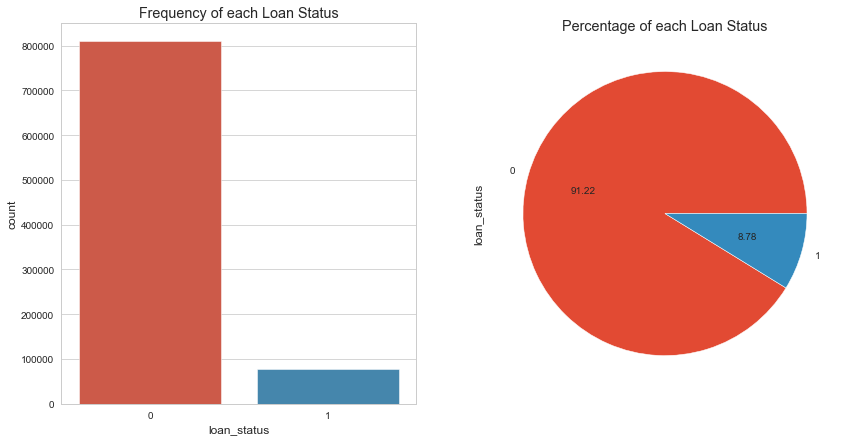

In [79]:
fig = plt.figure(figsize = (14,7))
plt.subplot(121)
sns.countplot(x = 'loan_status',data = loans_2)
plt.title('Frequency of each Loan Status')
plt.subplot(122)
loans_2['loan_status'].value_counts().plot(kind = 'pie',autopct = '%1.2f')
plt.title('Percentage of each Loan Status')

In [80]:
#将emp_length,grade特征的文字值用数值表示
mapping_dict = {
    'emp_length':{
        '10+ years':10,
        '9 years' :9,
        '8 years' :8,
        '7 years' :7,
        '6 years' :6,
        '5 years' :5,
        '4 years' :4,
        '3 years' :3,
        '2 years' :2,
        '1 year' :1,
        '< 1 year':0,
        'Unknown' :0
    },
    'grade':{
        'A':1,
        'B':2,
        'C':3,
        'D':4,
        'E':5,
        'F':6,
        'G':7
    }
}

loans_2 = loans_2.replace(mapping_dict)


In [81]:
loans_2[['emp_length','grade']].apply(pd.value_counts)

,emp_length,grade
0,115430,nan
1,57095,148202.0000
2,78870,254535.0000
3,70026,245860.0000
4,52529,139542.0000
5,55704,70705.0000
6,42950,23046.0000
7,44594,5489.0000
8,43955,nan
9,34657,nan


从上可以看出 emp_length，grade 已转为数值

In [82]:
#one_hot编码
oh_feature = ["home_ownership", "verification_status", "application_type","purpose", "term"] 
dumm_feature = pd.get_dummies(loans_2[oh_feature])
loans_2 = pd.concat([loans_2,dumm_feature],axis=1)
loans_2.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,application_type_INDIVIDUAL,application_type_JOINT,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,term_ 36 months,term_ 60 months
0,1077501,1296599,5000.0000,5000.0000,4975.0000,36 months,10.6500,162.8700,2,10,RENT,24000.0000,Verified,0,credit_card,27.6500,0.0000,1.0000,34.0638,3.0000,0.0000,13648.0000,83.7000,9.0000,0.0000,0.0000,5861.0714,5831.7800,5000.0000,861.0700,0.0000,0.0000,0.0000,171.6200,0.0000,INDIVIDUAL,0.0000,225.7026,139458.1893,32068.6200,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1077430,1314167,2500.0000,2500.0000,2500.0000,60 months,15.2700,59.8300,3,0,RENT,30000.0000,Source Verified,1,car,1.0000,0.0000,5.0000,34.0638,3.0000,0.0000,1687.0000,9.4000,4.0000,0.0000,0.0000,1008.7100,1008.7100,456.4600,435.1700,0.0000,117.0800,1.1100,119.6600,0.0000,INDIVIDUAL,0.0000,225.7026,139458.1893,32068.6200,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1077175,1313524,2400.0000,2400.0000,2400.0000,36 months,15.9600,84.3300,3,10,RENT,12252.0000,Not Verified,0,small_business,8.7200,0.0000,2.0000,34.0638,2.0000,0.0000,2956.0000,98.5000,10.0000,0.0000,0.0000,3003.6536,3003.6500,2400.0000,603.6500,0.0000,0.0000,0.0000,649.9100,0.0000,INDIVIDUAL,0.0000,225.7026,139458.1893,32068.6200,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,1076863,1277178,10000.0000,10000.0000,10000.0000,36 months,13.4900,339.3100,3,10,RENT,49200.0000,Source Verified,0,other,20.0000,0.0000,1.0000,35.0000,10.0000,0.0000,5598.0000,21.0000,37.0000,0.0000,0.0000,12226.3022,12226.3000,10000.0000,2209.3300,16.9700,0.0000,0.0000,357.4800,0.0000,INDIVIDUAL,0.0000,225.7026,139458.1893,32068.6200,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,1075358,1311748,3000.0000,3000.0000,3000.0000,60 months,12.6900,67.7900,2,1,RENT,80000.0000,Source Verified,0,other,17.9400,0.0000,0.0000,38.0000,15.0000,0.0000,27783.0000,53.9000,38.0000,766.9000,766.9000,3242.1700,3242.1700,2233.1000,1009.0700,0.0000,0.0000,0.0000,67.7900,0.0000,INDIVIDUAL,0.0000,225.7026,139458.1893,32068.6200,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [84]:
loans_2.isna() .shape

(887379, 67)

经过one_hot操作变成了67个特征

In [85]:
loans_2.loc[:,loans_2.columns.str.contains('home_ownership')].shape

(887379, 7)

In [86]:
#剔除被one_hot 的特征
loans_2 = loans_2.drop(oh_feature,axis=1)
loans_2.shape

(887379, 62)

### 特征缩放

In [87]:
num_col = loans_2.select_dtypes(['float64','int64']).columns
num_col = num_col.drop('loan_status')

In [88]:
#标准化处理，并建立loans_3保存
from sklearn.preprocessing import StandardScaler
ssc = StandardScaler()
loans_3 = loans_2
#数据太多只能分列标准化处理
for name in num_col:
    loans_3[name] = ssc.fit_transform(np.array(loans_2[name]).reshape(-1,1))
loans_3.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,emp_length,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,application_type_INDIVIDUAL,application_type_JOINT,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,term_ 36 months,term_ 60 months
0,-1.3750,-1.3978,-1.1565,-1.1556,-1.1523,-0.5926,-1.1215,-0.6083,1.1281,-0.7887,0,0.5522,-0.3647,0.3059,0.0000,-1.6077,-0.3355,-0.1459,1.2016,-1.3739,-0.9894,-0.9894,-0.2157,-0.2153,-0.1144,-0.4265,-0.0970,-0.1121,-0.0773,-0.4156,-0.1072,-0.0643,0.0000,0.0000,0.0000,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,-1.3750,-1.3971,-1.4528,-1.4522,-1.4454,0.4617,-1.5434,0.1536,-1.4986,-0.6960,1,-0.9980,-0.3647,4.3121,0.0000,-1.6077,-0.3355,-0.6793,-1.9166,-1.7962,-0.9894,-0.9894,-0.8322,-0.8300,-0.8001,-0.6298,-0.0970,0.1737,-0.0597,-0.4264,-0.1072,-0.0643,0.0000,0.0000,0.0000,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,-1.3750,-1.3971,-1.4647,-1.4641,-1.4573,0.6192,-1.4431,0.1536,1.1281,-0.9703,0,-0.5490,-0.3647,1.3074,0.0000,-1.7958,-0.3355,-0.6227,1.8228,-1.2895,-0.9894,-0.9894,-0.5787,-0.5758,-0.5068,-0.5494,-0.0970,-0.1121,-0.0773,-0.3158,-0.1072,-0.0643,0.0000,0.0000,0.0000,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,-1.3750,-1.3986,-0.5637,-0.5625,-0.5570,0.0555,-0.3989,0.1536,1.1281,-0.3992,0,0.1072,-0.3647,0.3059,0.0612,-0.2912,-0.3355,-0.5049,-1.4298,0.9908,-0.9894,-0.9894,0.5930,0.5997,0.6403,0.2169,4.0543,-0.1121,-0.0773,-0.3768,-0.1072,-0.0643,0.0000,0.0000,0.0000,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,-1.3751,-1.3972,-1.3936,-1.3929,-1.3862,-0.1271,-1.5108,-0.6083,-1.2359,0.0769,0,-0.0126,-0.3647,-0.6957,0.2575,0.6491,-0.3355,0.4843,-0.0490,1.0753,-0.8991,-0.8990,-0.5484,-0.5454,-0.5320,-0.3559,-0.0970,-0.1121,-0.0773,-0.4372,-0.1072,-0.0643,0.0000,0.0000,0.0000,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


### 特征选择

In [89]:
X = loans_3.drop('loan_status',axis=1)
y = loans_3['loan_status']

In [90]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
id,887379.0000,-0.0000,1.0000,-1.4198,-1.0189,0.0862,0.9832,1.5837
member_id,887379.0000,-0.0000,1.0000,-1.4486,-1.0005,0.0868,0.9733,1.5984
loan_amnt,887379.0000,0.0000,1.0000,-1.6899,-0.8008,-0.2081,0.6217,2.4000
funded_amnt,887379.0000,-0.0000,1.0000,-1.6894,-0.7998,-0.2066,0.6237,2.4031
funded_amnt_inv,887379.0000,-0.0000,1.0000,-1.7416,-0.7939,-0.2017,0.6275,2.4043
int_rate,887379.0000,0.0000,1.0000,-1.8090,-0.7432,-0.0586,0.6740,3.5928
installment,887379.0000,-0.0000,1.0000,-1.7243,-0.7208,-0.2218,0.5565,4.1310
grade,887379.0000,-0.0000,1.0000,-1.3701,-0.6083,0.1536,0.9154,3.2010
emp_length,887379.0000,-0.0000,1.0000,-1.4986,-0.9732,0.0774,1.1281,1.1281
annual_inc,887379.0000,-0.0000,1.0000,-1.1597,-0.4641,-0.1550,0.2314,145.6761


数据集太大，笔记本吃不消，所以选取部分数据训练模型

In [91]:
#选取后5万条数据
X_part = X[-50000:]
y_part = y[-50000:]

In [92]:
X_part.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,application_type_INDIVIDUAL,application_type_JOINT,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,term_ 36 months,term_ 60 months
837379,0.3183,0.3132,1.5701,1.5728,1.5751,1.2765,1.1760,1.6773,0.0774,0.2778,0.5417,-0.3647,-0.6957,0.8461,0.4611,-0.3355,0.1165,-0.0280,0.7375,1.9479,1.9491,-0.0444,-0.0397,-0.4083,1.1465,-0.0970,-0.1121,-0.0773,-0.3004,-0.1072,-0.0643,0.0160,1.0853,0.1065,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
837380,0.3713,0.3656,-1.0972,-1.0963,-1.0901,-1.1563,-1.0808,-0.6083,-0.9732,0.1541,-0.0929,-0.3647,-0.6957,0.3883,1.4014,-0.3355,2.0547,-1.3374,2.5955,-0.9894,-0.9894,-0.2392,-0.2352,-0.0389,-0.7536,-0.0970,-0.1121,-0.0773,0.5887,-0.1072,-0.0643,-0.0228,1.1115,1.9574,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
837381,0.3801,0.3739,-0.9194,-0.9184,-0.9124,0.5393,-0.7861,0.9154,-0.7106,0.4633,-0.1301,0.7951,0.3059,-1.2469,2.5298,-0.3355,0.4159,1.1765,2.7644,-0.3777,-0.3775,-0.6190,-0.6162,-0.5966,-0.4169,-0.0970,-0.1121,-0.0773,-0.4003,-0.1072,-0.0643,-0.0228,2.5679,-0.0130,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
837382,0.3713,0.3655,0.0290,0.0306,0.0352,0.0190,-0.3804,0.1536,-0.1852,-0.5414,0.8233,-0.3647,-0.6957,-0.5928,0.2730,-0.3355,-0.3703,-1.1528,1.2442,0.5340,0.5346,-0.4812,-0.4779,-0.5579,-0.0215,-0.0970,-0.1121,-0.0773,-0.3796,-0.1072,-0.0643,0.0581,-0.4206,-0.0241,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
837383,0.3717,0.3660,0.6217,0.6237,0.6246,-0.2183,0.9433,0.1536,-1.4986,0.6333,0.3835,-0.3647,0.3059,3.5279,0.2730,1.3824,-0.1599,0.7316,0.4841,0.7351,0.7337,-0.0382,-0.0347,-0.0611,0.0716,-0.0970,-0.1121,-0.0773,-0.3122,-0.1072,-0.0643,-0.0228,-0.4876,-0.3799,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0


In [93]:
#利用递归消除特征法（Recursive Feature Elimination）降维，将特征降到30个
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression()
rfe = RFE(LR_model,30)
rfe = rfe.fit(X_part,y_part)

In [96]:
filter_col = X_part.columns[rfe.support_]
filter_col

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'int_rate', 'installment', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'home_ownership_MORTGAGE', 'home_ownership_OWN', 'home_ownership_RENT',
       'verification_status_Not Verified',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_INDIVIDUAL', 'purpose_credit_card', 'purpose_medical',
       'purpose_moving', 'purpose_other', 'purpose_small_business',
       'term_ 36 months', 'term_ 60 months'],
      dtype='object')

这些就是降维后的30个特征

然后利用皮尔逊相关系谱图找冗余特征

Text(0.5, 1.0, 'Pearson Correlation of Feature')

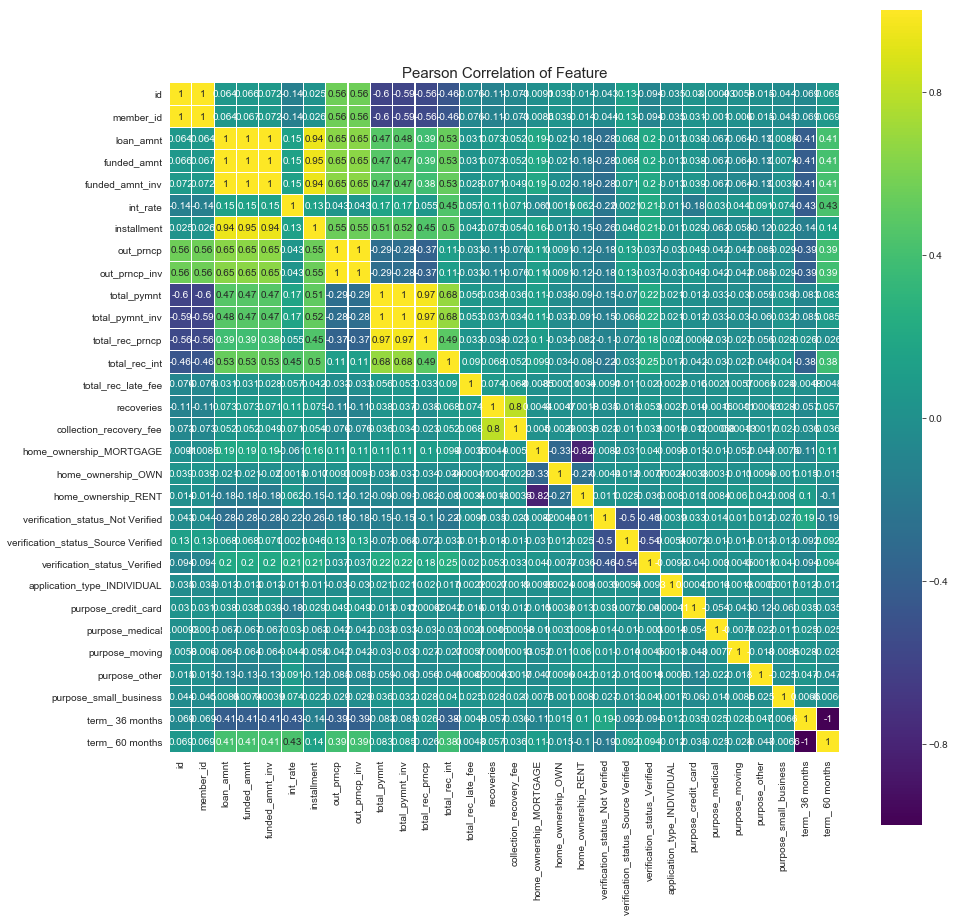

In [100]:
colormap = plt.cm.viridis
plt.figure(figsize=(15,15))
sns.heatmap(loans_3[filter_col].corr(),linewidths=0.1,cmap=colormap,vmax=1,square=True,
           linecolor = 'white',annot = True)
plt.title('Pearson Correlation of Feature',size = 15)


In [112]:
#从上图看出的冗余特征如下
drop_col = ['id','member_id','funded_amnt', 'funded_amnt_inv',
            'installment', 'out_prncp_inv','total_pymnt_inv', 
            'total_rec_prncp', 'total_rec_int','collection_recovery_fee', 'home_ownership_OWN',
            'home_ownership_RENT' , 'term_ 36 months', 
            'verification_status_Source Verified','int_rate']

col_new = filter_col.drop(drop_col) #剔除冗余特征
print(len(col_new))

15


除去一些冗余特征后还剩15个特征

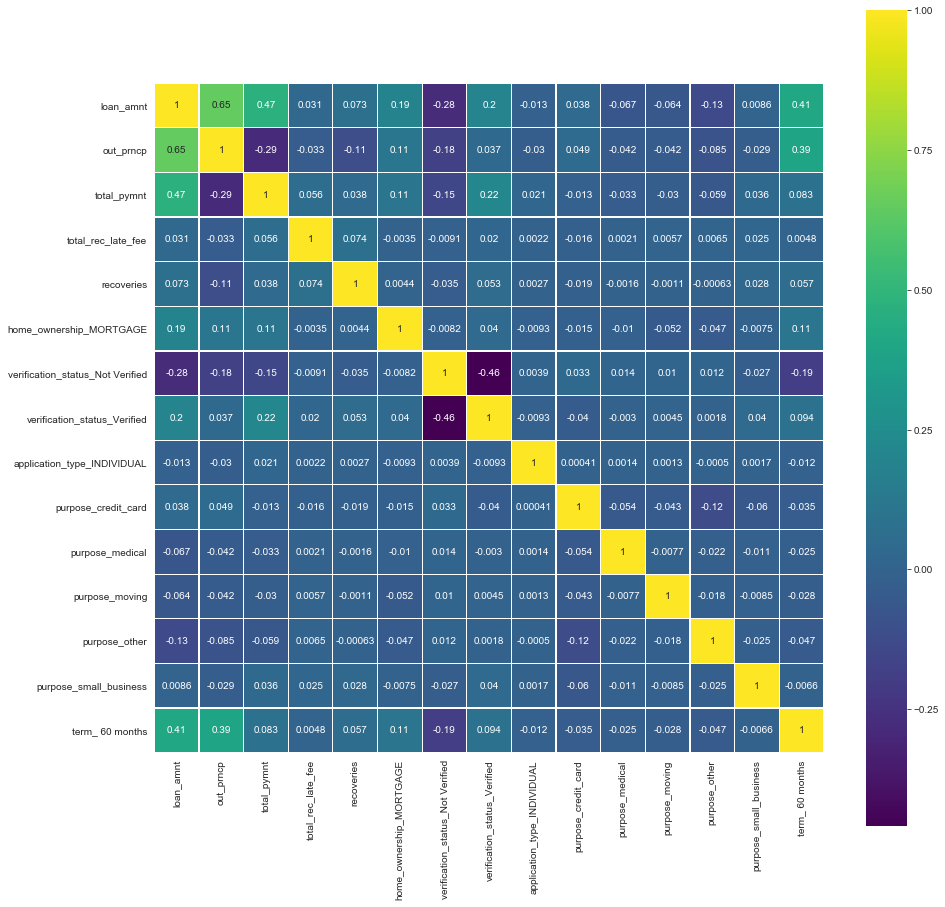

In [113]:
colormap = plt.cm.viridis
plt.figure(figsize = (15,15))
sns.heatmap(loans_3[col_new].corr(),linewidths = 0.2,vmax=1,square=True,linecolor='white',
           cmap = colormap,annot=True)

'out_prncp'特征相关性还是很高 剔除掉该特征

In [114]:
col_new = col_new.drop('out_prncp')


X_part[col_new].shape

(50000, 14)

## 筛选重要特征

In [116]:
#用随机森林算法判断重要特征
names = loans_3[col_new].columns
from sklearn.ensemble import RandomForestClassifier
RF_clf = RandomForestClassifier(n_estimators=10,random_state=22)
RF_clf.fit(X_part[col_new],y_part)
for feature in zip(names,RF_clf.feature_importances_):
    print(feature)

('loan_amnt', 0.34696464883052014)
('total_pymnt', 0.5042407911233814)
('total_rec_late_fee', 0.04635773283601445)
('recoveries', 0.05929912104431219)
('home_ownership_MORTGAGE', 0.0056719005858410845)
('verification_status_Not Verified', 0.0048713894654482245)
('verification_status_Verified', 0.004914566353970865)
('application_type_INDIVIDUAL', 0.0)
('purpose_credit_card', 0.003980199522309935)
('purpose_medical', 0.0011087439191859497)
('purpose_moving', 0.0009788904117121896)
('purpose_other', 0.0026282173315568466)
('purpose_small_business', 0.0016916299384383722)
('term_ 60 months', 0.017292168637308612)


发现total_pymnt,loan_amnt 两个特征很重要

### 训练模型

In [119]:
y_part.value_counts()/len(y_part)

0   0.9368
1   0.0632
Name: loan_status, dtype: float64

标签类别占比非常不平衡 违约的只占6.3%  

In [125]:
#利用SMOTE模块平衡数据
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=33)
X_balance,y_balance = sm.fit_sample(X_part,y_part)
pd.Series(y_balance).value_counts()/len(y_balance)

1   0.5000
0   0.5000
dtype: float64

标签平衡了

## 模型训练

In [130]:
#线性回归模型
from sklearn.linear_model import LogisticRegression
LR_clf = LogisticRegression()
LR_clf.fit(X_balance,y_balance)
LR_clf.score(X_balance,y_balance)

0.9271593868750266

In [138]:
#查看模型的性能
from sklearn.metrics import roc_auc_score
y_prd = LR_clf.predict(X_balance)
roc_auc_score(y_balance,y_prd)

0.9271593868750266

In [140]:
from sklearn.metrics import classification_report
print(classification_report(y_balance,y_prd))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93     46842
           1       0.96      0.89      0.92     46842

   micro avg       0.93      0.93      0.93     93684
   macro avg       0.93      0.93      0.93     93684
weighted avg       0.93      0.93      0.93     93684



In [141]:
#决策树模型
from sklearn.tree import DecisionTreeClassifier
DT_clf = DecisionTreeClassifier(splitter='random',min_samples_split=10,min_samples_leaf=5)
DT_clf.fit(X_balance,y_balance)
DT_clf.score(X_balance,y_balance)

0.9772853422142521

In [143]:
y_pre_t = DT_clf.predict(X_balance)
print(classification_report(y_balance,y_pre_t))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98     46842
           1       0.98      0.97      0.98     46842

   micro avg       0.98      0.98      0.98     93684
   macro avg       0.98      0.98      0.98     93684
weighted avg       0.98      0.98      0.98     93684



In [144]:
roc_auc_score(y_balance,y_pre_t)

0.9772853422142522